## ĐỒ ÁN CUỐI KỲ - CSC17104: LẬP TRÌNH KHOA HỌC DỮ LIỆU
### TRƯỜNG ĐẠI HỌC KHOA HỌC TỰ NHIÊN - ĐHQG-HCM
#### Khoa Công nghệ Thông tin

**Tên đề tài:** Phân tích Xu hướng Âm nhạc Toàn cầu trên Spotify (2009-2025)
**Bộ dữ liệu:** Spotify Global Music Dataset 2009-2025

**Danh sách thành viên nhóm:**
1. [MSSV] - [Họ và Tên]
2. [MSSV] - [Họ và Tên]
3. [MSSV] - [Họ và Tên]

---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Cấu hình hiển thị biểu đồ và pandas
sns.set(style="whitegrid")
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')

## 1. Thu thập dữ liệu (Data Collection)

### Tổng quan về bộ dữ liệu
* **Chủ đề:** Bộ dữ liệu chứa các thống kê âm thanh của các bài hát hàng đầu trên Spotify. Nó phản ánh sự phát triển của xu hướng âm nhạc, các đặc trưng âm thanh (như độ sôi động, năng lượng) và độ phổ biến qua các năm.
* **Ngữ cảnh thực tế:** Dữ liệu đại diện cho hành vi tiêu thụ âm nhạc toàn cầu và đặc điểm âm học của các bài hát thịnh hành trong hơn 15 năm qua.

### Nguồn gốc
* **Nền tảng:** Kaggle
* **URL:** https://www.kaggle.com/datasets/wardabilal/spotify-global-music-dataset-20092025
* **Tác giả:** Warda Bilal

### Giấy phép & Sử dụng
* **Giấy phép:** (Kiểm tra lại trên Kaggle, thường là Apache 2.0 hoặc CC0).
* **Quyền sử dụng:** Được phép sử dụng cho mục đích giáo dục trong môn học này.

### Tại sao chọn dữ liệu này?
* Âm nhạc là chủ đề phổ biến và dễ tiếp cận.
* Bộ dữ liệu có sự kết hợp tốt giữa dữ liệu số (đặc trưng âm thanh) và dữ liệu phân loại (nghệ sĩ, thể loại).
* Cho phép thực hiện các bài toán Machine Learning thú vị, ví dụ như dự đoán độ "hot" của một bài hát dựa trên giai điệu.

In [2]:

try:
    df = pd.read_csv('spotify_data_clean.csv')
    print("Đã tải dữ liệu thành công!")
except FileNotFoundError:
    print("Không tìm thấy file. Vui lòng upload dataset và kiểm tra lại đường dẫn.")




Đã tải dữ liệu thành công!


## 2. Data Exploration (Khung phân tích)



### 2.1 Tổng quan về Bộ dữ liệu
1. Thông tin Cơ bản
+ Bộ dữ liệu của bạn có bao nhiêu hàng?
+ Bộ dữ liệu của bạn có bao nhiêu cột?
+ Mỗi hàng đại diện cho điều gì? (ví dụ: một khách hàng, một giao dịch, một ngày)
+ Kích thước tổng thể của bộ dữ liệu là bao nhiêu?
2. Tính Toàn vẹn của Dữ liệu
+ Có hàng nào bị trùng lặp không? Nếu có, là bao nhiêu?
+ Các bản sao nên được giữ lại hay loại bỏ? (Giải thích quyết định của bạn)
+ Tất cả các hàng có đầy đủ không, hay có một số hàng hoàn toàn trống?

1. Thông tin cơ bản 

In [3]:
nrows,ncolumns=df.shape
print(f"So dong: {nrows}, So cot: {ncolumns}")
df.head()

So dong: 8582, So cot: 15


,track_id,track_name,track_number,track_popularity,explicit,artist_name,artist_popularity,artist_followers,artist_genres,album_id,album_name,album_release_date,album_total_tracks,album_type,track_duration_min
0,3EJS5LyekDim1Tf5rBFmZl,Trippy Mane (ft. Project Pat),4,0,True,Diplo,77,2812821,moombahton,5QRFnGnBeMGePBKF2xTz5z,"d00mscrvll, Vol. 1",2025-10-31,9,album,1.55
1,1oQW6G2ZiwMuHqlPpP27DB,OMG!,1,0,True,Yelawolf,64,2363438,"country hip hop, southern hip hop",4SUmmwnv0xTjRcLdjczGg2,OMG!,2025-10-31,1,single,3.07
2,7mdkjzoIYlf1rx9EtBpGmU,Hard 2 Find,1,4,True,Riff Raff,48,193302,NaN,3E3zEAL8gUYWaLYB9L7gbp,Hard 2 Find,2025-10-31,1,single,2.55
3,67rW0Zl7oB3qEpD5YWWE5w,Still Get Like That (ft. Project Pat & Starrah),8,30,True,Diplo,77,2813710,moombahton,5QRFnGnBeMGePBKF2xTz5z,"d00mscrvll, Vol. 1",2025-10-31,9,album,1.69
4,15xptTfRBrjsppW0INUZjf,ride me like a harley,2,0,True,Rumelis,48,8682,dark r&b,06FDIpSHYmZAZoyuYtc7kd,come closer / ride me like a harley,2025-10-30,2,single,2.39


- Mỗi dòng biểu thị thông tin của một bài hát bao gồm tên bài hát, tên tác giả, id bài hát,...

In [4]:
import os
file_path="spotify_data_clean.csv"
size_bytes=os.path.getsize(file_path)
size_kb= size_bytes/(1024)
print(f"Kich thuoc du lieu: {size_kb:.2f} KB")

Kich thuoc du lieu: 1385.89 KB


In [5]:
# Kiem tra duplicate
dup_count=df.duplicated().sum()
print(f"So dong trung: {dup_count}")
df = df.replace(r'^\s*$', pd.NA, regex=True)
empty_rows = df.isna().all(axis=1).sum()
print(f"So dong trong: {empty_rows}")

So dong trung: 0
So dong trong: 0


Theo kết quả ở trên thì chúng ta thấy rằng không có dòng nào bị trống hay bị trùng.

### 2.2 Phân tích biến số số (numerical)  

1. Phân bố & Xu hướng trung tâm (Distribution & Central Tendency)

In [6]:
num_cols = ['track_number','track_popularity','artist_popularity','artist_followers','album_total_tracks','track_duration_min']

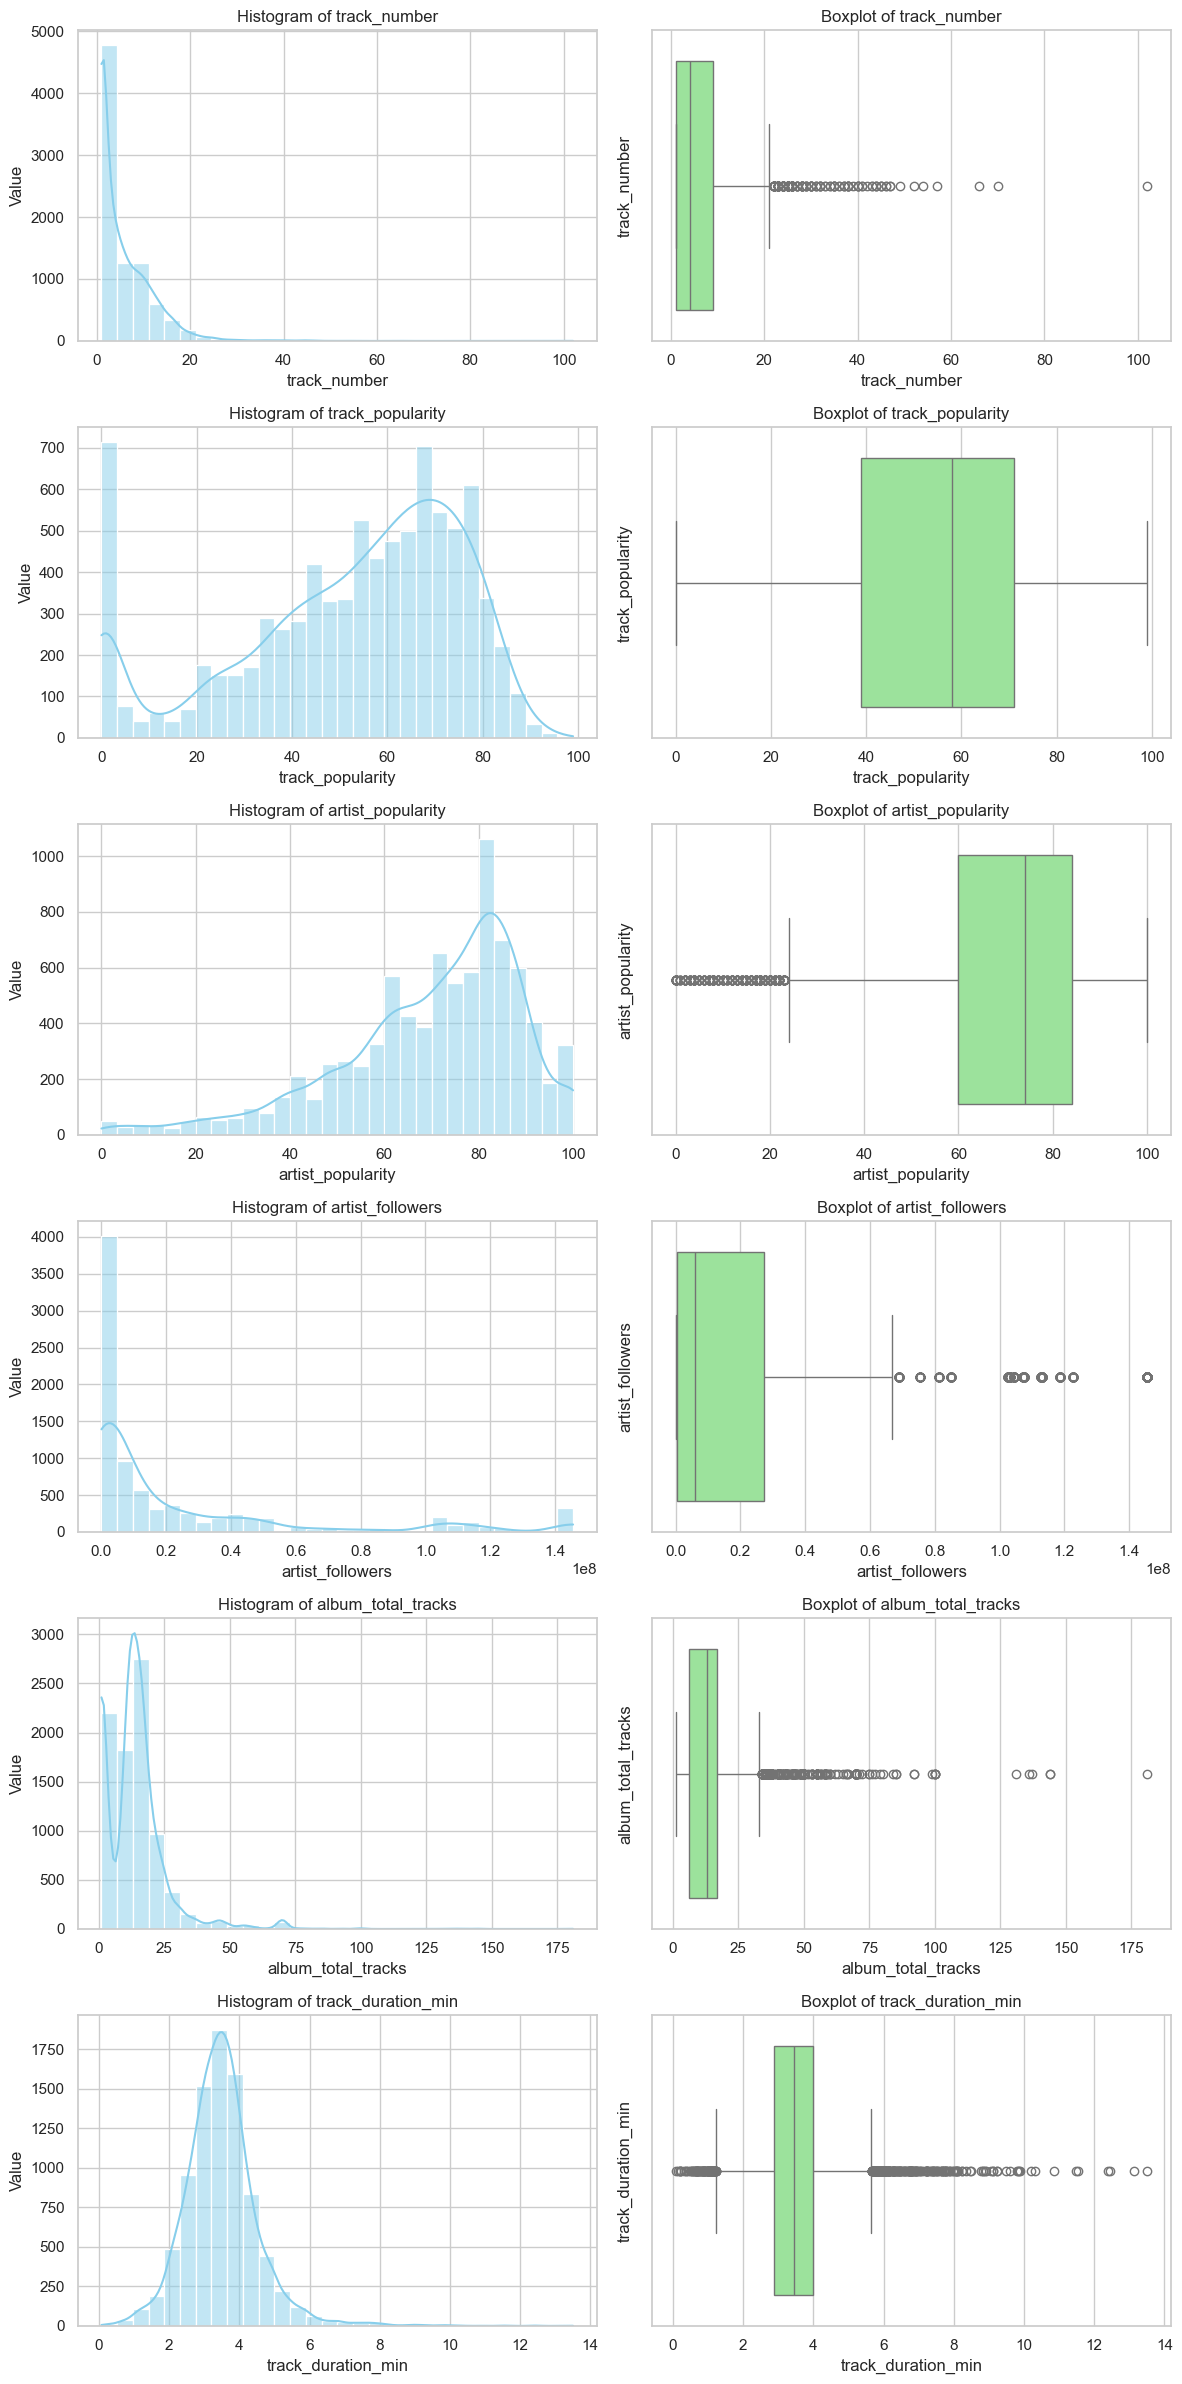

In [7]:
# Hình dạng phân bố dữ liệu là gì?
# Trực quan hóa dữ liệu: histogram, box plot, density plot,...

# Số cột
n_cols = len(num_cols)

fig, axes = plt.subplots(nrows=n_cols, ncols=2, figsize=(12,4*n_cols))

for i, col in enumerate(num_cols):
    # Histplot
    sns.histplot(df[col], kde = True, bins =30, color ='skyblue', ax = axes[i,0])
    axes[i,0].set_title(f'Histogram of {col}')
    axes[i,0].set_xlabel(col)
    axes[i,0].set_ylabel('Value')
    
    # Boxplot
    sns.boxplot(x=df[col], color='lightgreen', ax=axes[i,1])
    axes[i,1].set_title(f'Boxplot of {col}')
    axes[i,1].set_ylabel(col)
    
plt.tight_layout()
plt.show()

In [8]:
# Tính toán: trung bình (mean), trung vị (median), độ lệch chuẩn (standard deviation)
# Dictionary để lưu mean, median, std
dist_dict = {}
for col in num_cols:
    dist_dict[col] = {
        'mean': df[col].mean(),
        'median':df[col].median(),
        'std':df[col].std()
    }
# Chuyển thành dataframe
dist_df = pd.DataFrame(dist_dict).T
dist_df = dist_df.round(2)
dist_df

,mean,median,std
track_number,5.77,4.00,6.05
track_popularity,52.36,58.00,23.82
artist_popularity,69.73,74.00,19.65
artist_followers,24034719.33,6105547.00,38031804.96
album_total_tracks,13.79,13.00,11.89
track_duration_min,3.49,3.44,1.06


2. Range & Outliers:

In [9]:
# Giá trị nhỏ nhất và lớn nhất là bao nhiêu?
# Dictionary để lưu max, min
range_dict = {}
for col in num_cols:
    range_dict[col] = {
        'min': df[col].min(),
        'max':df[col].max()
    }
# Chuyển thành dataframe
range_df = pd.DataFrame(range_dict).T
pd.options.display.float_format = '{:.2f}'.format
range_df

,min,max
track_number,1.00,102.00
track_popularity,0.00,99.00
artist_popularity,0.00,100.00
artist_followers,0.00,145542136.00
album_total_tracks,1.00,181.00
track_duration_min,0.07,13.51


Câu hỏi: Các giá trị min/max có hợp lý không, hay cho thấy lỗi dữ liệu?  
>Trả lời: Các giá trị min/max hợp lý.

In [10]:
# Xác định giá trị ngoại lai bằng IQR
def detect_outliers(col):
    Q1 = np.percentile(df[col], 25)
    Q3 = np.percentile(df[col], 75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]

    num_outliers = outliers.shape[0]
    return lower_bound, upper_bound, num_outliers

outlier_dict = {}
for col in num_cols:
    lower, upper, count = detect_outliers(col)
    outlier_dict[col] = {
        'lower_bound': lower,
        'upper_bound': upper,
        'number_outliers': count
    }

# Chuyển thành dataframe
outlier_df = pd.DataFrame(outlier_dict).T           
outlier_df

,lower_bound,upper_bound,number_outliers
track_number,-11.00,21.00,166.00
track_popularity,-9.00,119.00,0.00
artist_popularity,24.00,120.00,286.00
artist_followers,-39723026.50,67437897.50,1044.00
album_total_tracks,-10.50,33.50,379.00
track_duration_min,1.21,5.66,358.00


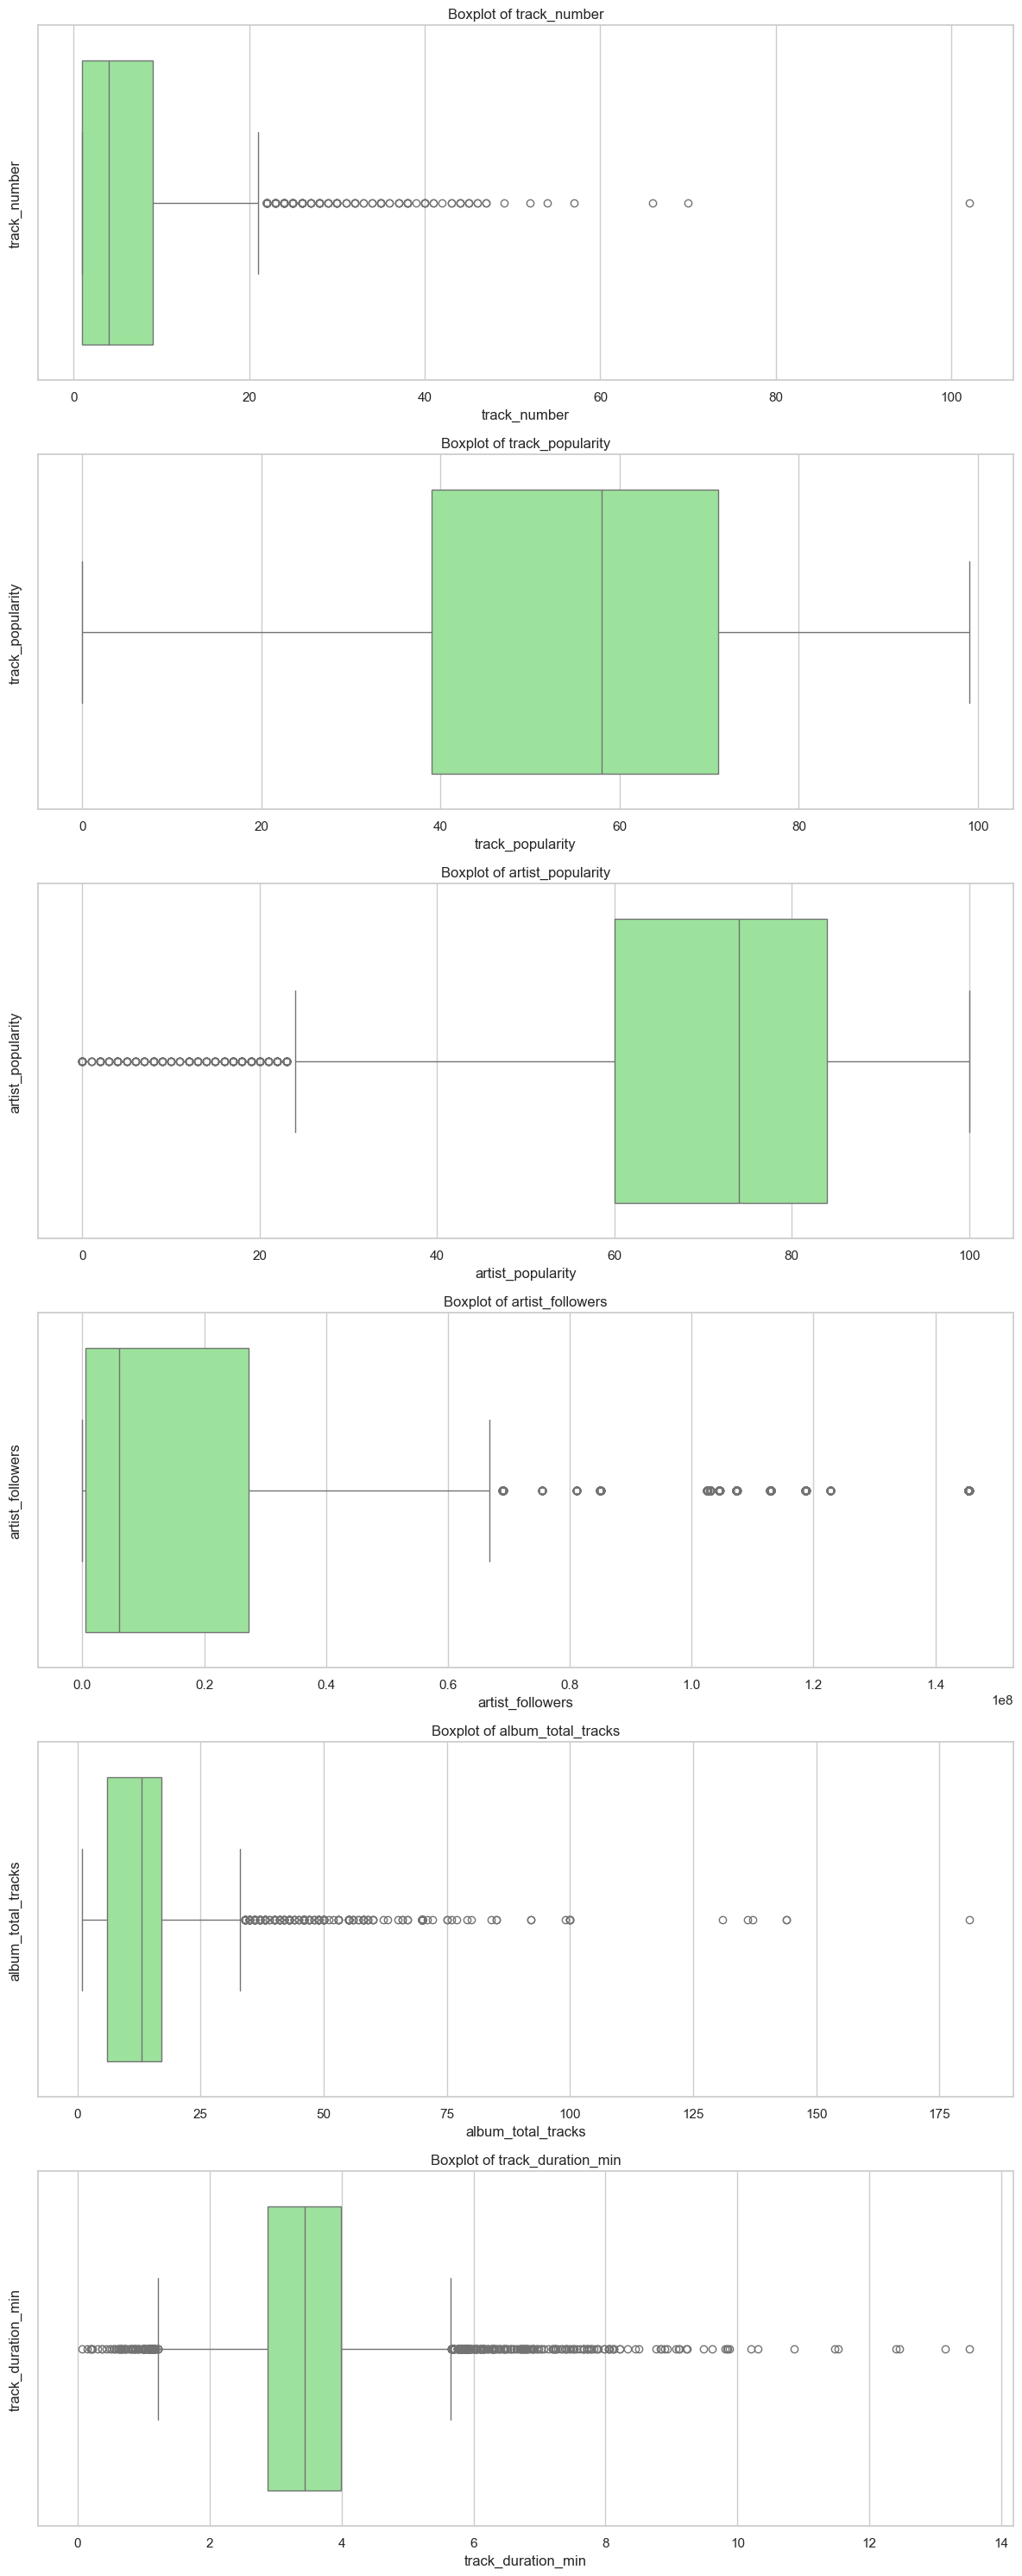

In [11]:
# Xác định giá trị ngoại lai bằng boxplot
n_cols = len(num_cols)

fig, axes = plt.subplots(nrows=n_cols, ncols=1, figsize=(12,5*n_cols))

for i, col in enumerate(num_cols):
    # Boxplot
    sns.boxplot(x=df[col], color='lightgreen', ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')
    axes[i].set_ylabel(col)
    
plt.tight_layout()
plt.show()

Câu hỏi: Các giá trị ngoại lai là cực trị thật hay lỗi nhập dữ liệu?  
>Trả lời: Các giá trị ngoại lai là hợp lí (vì max, min hợp lí)

3. Data Quality:

In [12]:
# Phần trăm dữ liệu bị thiếu?
miss_dict = {}

for col in num_cols:
    missing_count = df[col].isna().sum()
    missing_percent = round((missing_count)/len(df)*100,2)
    miss_dict[col] = {
        'missing_count': missing_count,
        'missing_percent': missing_percent
    }
miss_df = pd.DataFrame(miss_dict).T
miss_df

,missing_count,missing_percent
track_number,0.00,0.00
track_popularity,0.00,0.00
artist_popularity,0.00,0.00
artist_followers,0.00,0.00
album_total_tracks,0.00,0.00
track_duration_min,0.00,0.00


In [13]:
# Có giá trị không thể xảy ra không? (ví dụ: tuổi âm, giá = 0, sức chứa âm, …)

# Lọc ra các giá trị âm
invalid_mask = (df[num_cols] < 0).any(axis=1)

if(df[invalid_mask].empty):
    print('Không có giá trị không hợp lệ')
else:
    print('Giá trị không hợp lệ')
    df[invalid_mask]

Không có giá trị không hợp lệ


In [14]:
# Có giá trị thay thế (placeholder) nào được dùng để biểu thị dữ liệu thiếu không? (ví dụ: 999, -1, …)
placeholders = [-1,999,9999]
placeholder_mask = df[num_cols].isin(placeholders)

placeholder_counts = placeholder_mask.sum().sum()

print("Số lượng giá trị thay thế: ", placeholder_counts)

Số lượng giá trị thay thế:  0


### 2.3 Phân tích Cột Phân loại (Categorical Columns)

In [15]:
df = df.replace(['-', '–', 'N/A', 'null'], np.nan)
cat_cols= df.select_dtypes(include=['object']).columns
print(f"Các cột sẽ được phân tích: {list(cat_cols)}")

Các cột sẽ được phân tích: ['track_id', 'track_name', 'artist_name', 'artist_genres', 'album_id', 'album_name', 'album_release_date', 'album_type']


In [16]:
print("=== PHÂN PHỐI GIÁ TRỊ (VALUE DISTRIBUTION) ===")

for col in cat_cols:
    print(f"\n🔵 Cột: {col}")
    # Số lượng giá trị riêng biệt
    n_unique = df[col].nunique()
    # Giá trị phổ biến nhất
    top_val = df[col].mode()[0]
    freq = df[col].value_counts().iloc[0]
    pct = (freq / len(df)) * 100
    
    print(f"   - Unique values: {n_unique}")
    print(f"   - Most frequent: '{top_val}' (Xuất hiện {freq} lần - Chiếm {pct:.1f}%)")
    

=== PHÂN PHỐI GIÁ TRỊ (VALUE DISTRIBUTION) ===

🔵 Cột: track_id
   - Unique values: 8582
   - Most frequent: '003vvx7Niy0yvhvHt4a68B' (Xuất hiện 1 lần - Chiếm 0.0%)

🔵 Cột: track_name
   - Unique values: 7462
   - Most frequent: 'Flowers' (Xuất hiện 8 lần - Chiếm 0.1%)

🔵 Cột: artist_name
   - Unique values: 2546
   - Most frequent: 'Taylor Swift' (Xuất hiện 324 lần - Chiếm 3.8%)

🔵 Cột: artist_genres
   - Unique values: 661
   - Most frequent: 'soundtrack' (Xuất hiện 345 lần - Chiếm 4.0%)

🔵 Cột: album_id
   - Unique values: 5205
   - Most frequent: '3FFGbUutKWN1c4f0CJR4Uh' (Xuất hiện 70 lần - Chiếm 0.8%)

🔵 Cột: album_name
   - Unique values: 4870
   - Most frequent: 'Nevermind (Super Deluxe Edition)' (Xuất hiện 70 lần - Chiếm 0.8%)

🔵 Cột: album_release_date
   - Unique values: 2384
   - Most frequent: '2010-01-01' (Xuất hiện 76 lần - Chiếm 0.9%)

🔵 Cột: album_type
   - Unique values: 3
   - Most frequent: 'album' (Xuất hiện 5856 lần - Chiếm 68.2%)


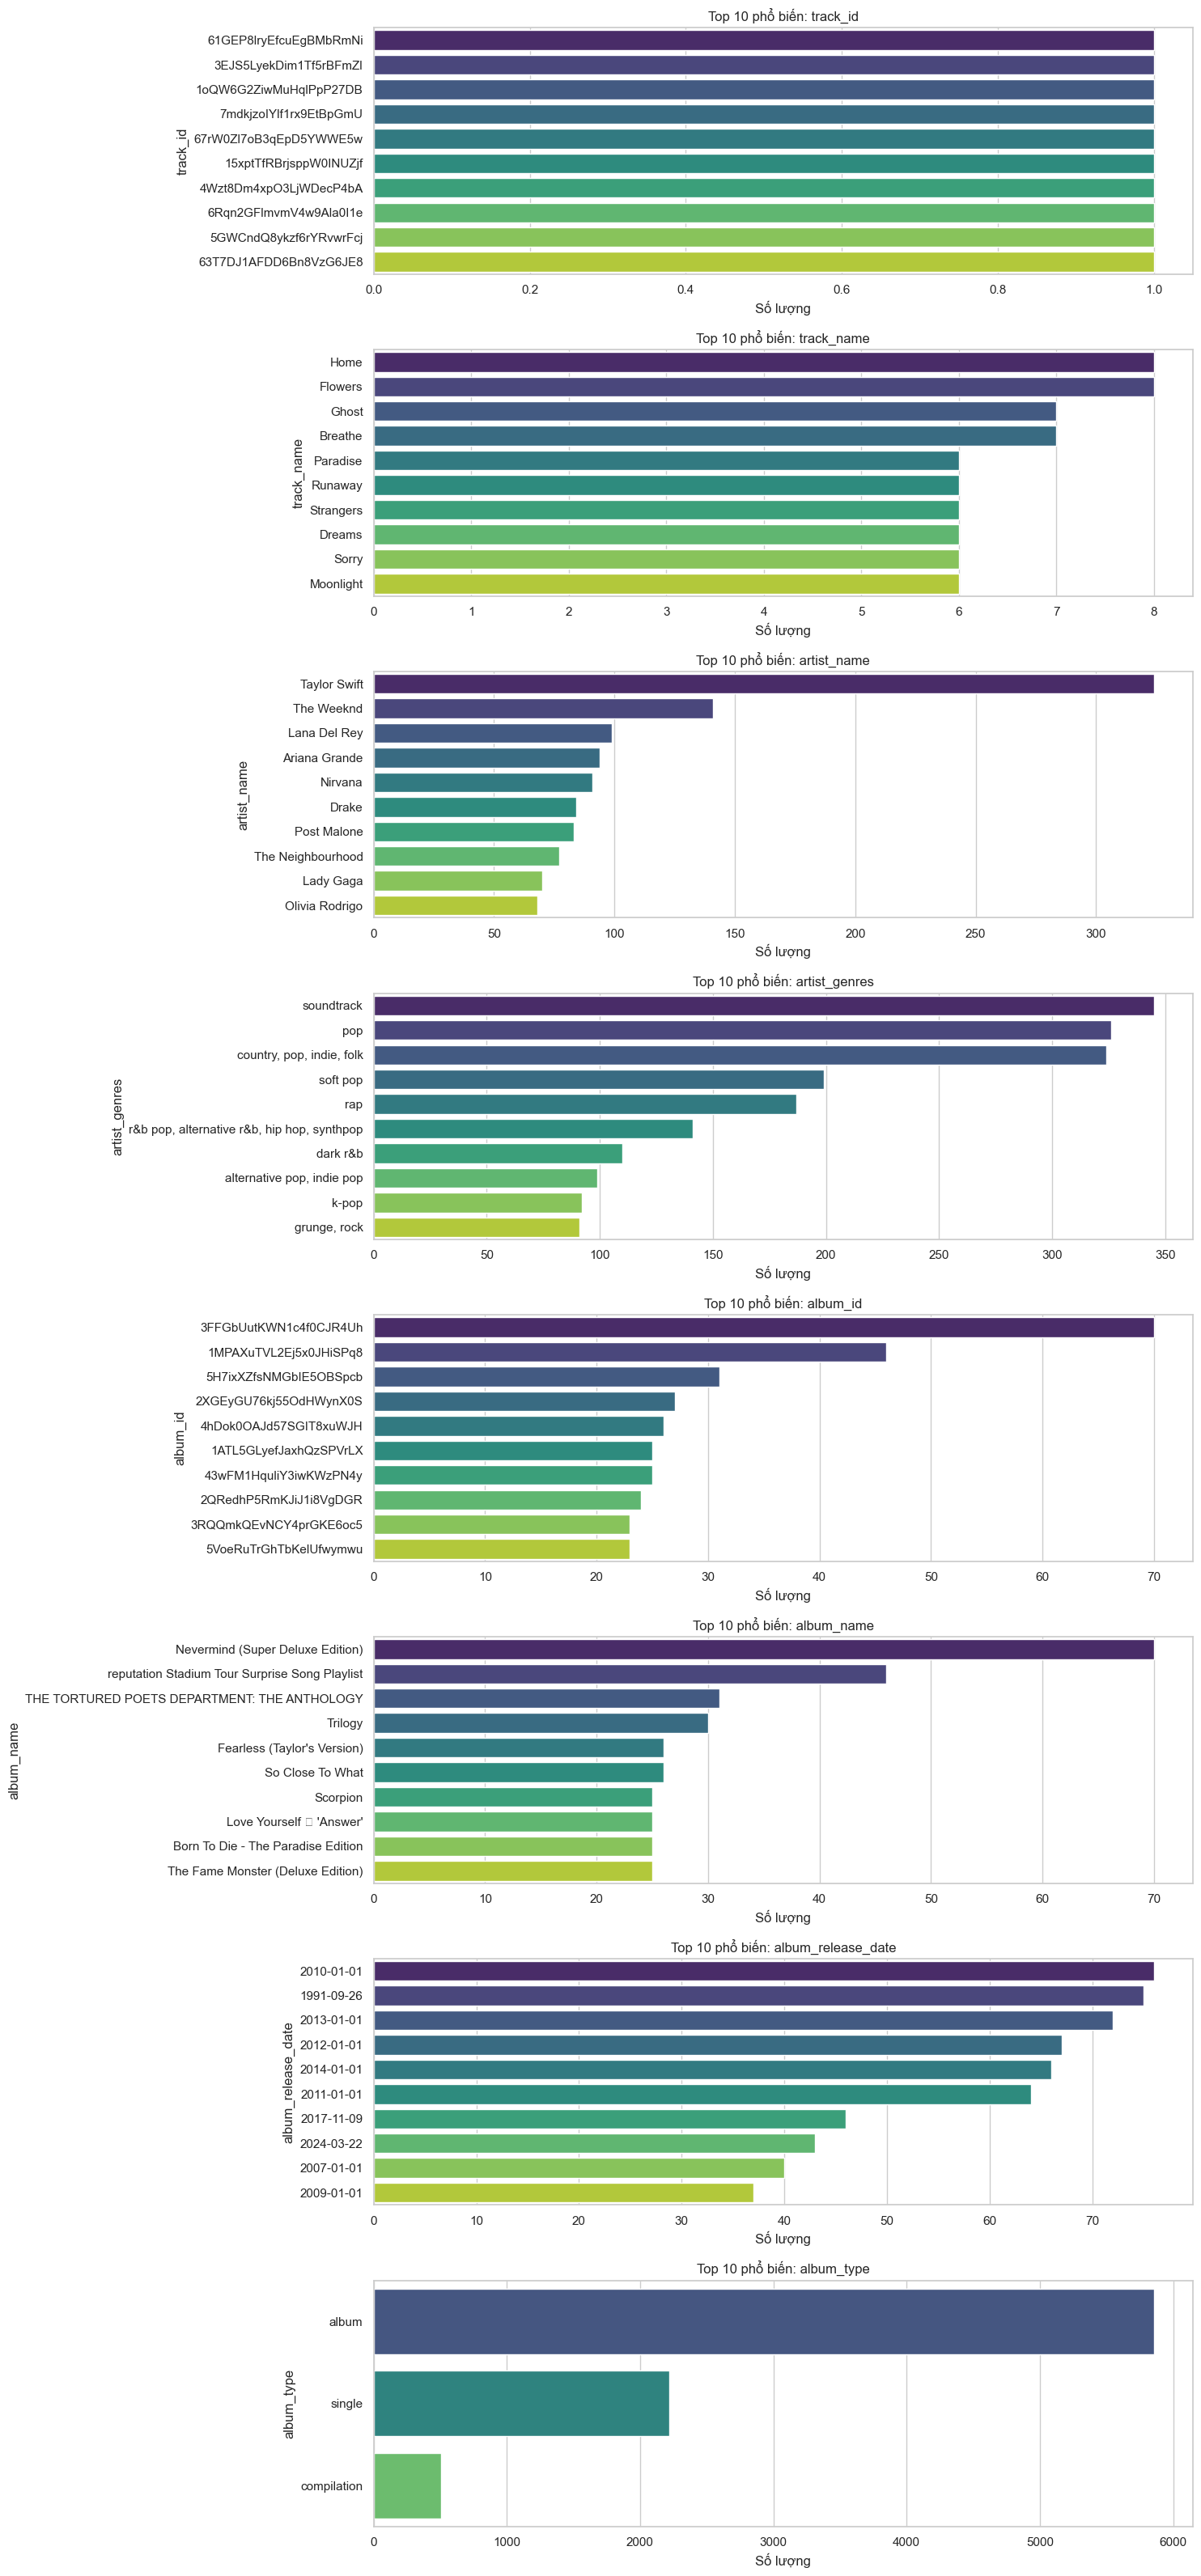

In [17]:
# Chỉnh kích thước tổng thể
plt.figure(figsize=(15, 4 * len(cat_cols))) # Tự động dài ra theo số lượng cột

for i, col in enumerate(cat_cols, 1):
    plt.subplot(len(cat_cols), 1, i) # Tạo ô vẽ thứ i
    
    # Chỉ lấy Top 10 để vẽ cho đẹp
    top_10 = df[col].value_counts().head(10).index
    sns.countplot(y=col, data=df, order=top_10, palette='viridis')
    
    plt.title(f'Top 10 phổ biến: {col}')
    plt.xlabel('Số lượng')

plt.tight_layout()
plt.show()

2. Chất lượng dữ liệu 

In [18]:
# Tạo một list để chứa kết quả
quality_data = []

for col in cat_cols:
    # 1. Tính Missing
    miss_count = df[col].isnull().sum()
    miss_pct = (miss_count / len(df)) * 100
    
    # 2. Kiểm tra Nhất quán (Inconsistency)
    n_orig = df[col].nunique()
    n_lower = df[col].str.lower().nunique()
    is_inconsistent = "CÓ LỖI" if n_orig != n_lower else "Ổn"
    
    # 3. Giá trị hiếm (<= 2 lần)
    rare_count = (df[col].value_counts() <= 2).sum()
    
    # Lưu vào list
    quality_data.append([col, miss_count, f"{miss_pct:.1f}%", is_inconsistent, rare_count])

# Tạo bảng DataFrame báo cáo
quality_df = pd.DataFrame(quality_data, columns=['Column', 'Missing Values', '% Missing', 'Inconsistency Check', 'Rare Values (<=2)'])

print("=== BẢNG ĐÁNH GIÁ CHẤT LƯỢNG DỮ LIỆU ===")
display(quality_df)

=== BẢNG ĐÁNH GIÁ CHẤT LƯỢNG DỮ LIỆU ===


,Column,Missing Values,% Missing,Inconsistency Check,Rare Values (<=2)
0,track_id,0,0.0%,Ổn,8582
1,track_name,0,0.0%,CÓ LỖI,7281
2,artist_name,4,0.0%,Ổn,1948
3,artist_genres,3361,39.2%,Ổn,434
4,album_id,0,0.0%,Ổn,4758
5,album_name,0,0.0%,CÓ LỖI,4361
6,album_release_date,0,0.0%,Ổn,1598
7,album_type,0,0.0%,Ổn,0


### 2.4 Missing Data  

1. Đánh giá tổng quan:

In [19]:
# Tạo bảng thống kê giá trị thiếu (missing values): gồm tên cột, số lượng bị thiếu và phần trăm bị thiếu.
miss_dict = {}

for col in df.columns:
    missing_count = df[col].isna().sum()
    missing_percent = round((missing_count)/len(df)*100,2)
    miss_dict[col] = {
        'missing_count': missing_count,
        'missing_percent':missing_percent
    }
miss_df = pd.DataFrame(miss_dict).T
miss_df

,missing_count,missing_percent
track_id,0.00,0.00
track_name,0.00,0.00
track_number,0.00,0.00
track_popularity,0.00,0.00
explicit,0.00,0.00
artist_name,4.00,0.05
artist_popularity,0.00,0.00
artist_followers,0.00,0.00
artist_genres,3361.00,39.16
album_id,0.00,0.00


Text(0.5, 1.0, 'Missing value heatmap')

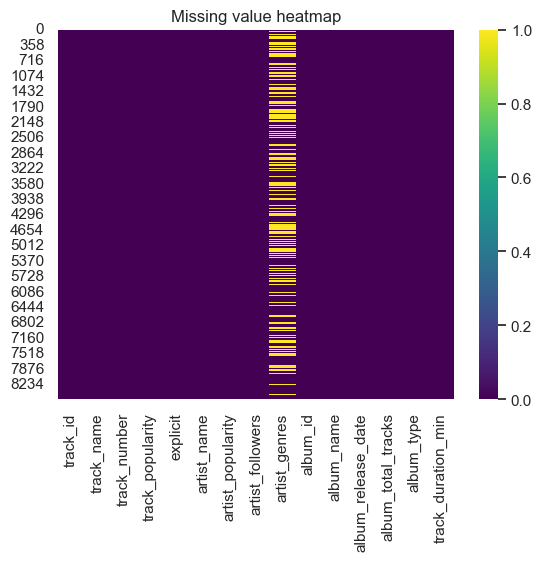

In [20]:
# Trực quan hóa mẫu hình dữ liệu bị thiếu bằng biểu đồ (heatmap hoặc bar chart).
sns.heatmap(df.isnull(), cmap="viridis")
plt.title('Missing value heatmap')

Câu hỏi: Xác định xem dữ liệu bị thiếu là ngẫu nhiên hay có quy luật?  
>Trả lời: Tập trung `artist_genres` và ngẫu nhiên tại `artist_name`

2. Chiến lược xử lý theo từng cột:

Với mỗi cột có giá trị bị thiếu:
- Giải thích vì sao dữ liệu bị thiếu?
  - Data collection issues: Dữ liệu thu thập từ các nguồn không trả về genre cho một số artist.
  - Not applicable: artist mới, chưa phân loại genre.
  - Random: tại cột `artist_name`
- Kế hoạch xử lý:
  - Đối với `artist_genres`: Giữ cột và điền "Unknown".
  - Đối với `artist_name`: Vì khi train model sẽ xóa cột, nên điền giá trị bằng "Unknown".

In [21]:
df.fillna("Unknown")

,track_id,track_name,track_number,track_popularity,explicit,artist_name,artist_popularity,artist_followers,artist_genres,album_id,album_name,album_release_date,album_total_tracks,album_type,track_duration_min
0,3EJS5LyekDim1Tf5rBFmZl,Trippy Mane (ft. Project Pat),4,0,True,Diplo,77,2812821,moombahton,5QRFnGnBeMGePBKF2xTz5z,"d00mscrvll, Vol. 1",2025-10-31,9,album,1.55
1,1oQW6G2ZiwMuHqlPpP27DB,OMG!,1,0,True,Yelawolf,64,2363438,"country hip hop, southern hip hop",4SUmmwnv0xTjRcLdjczGg2,OMG!,2025-10-31,1,single,3.07
2,7mdkjzoIYlf1rx9EtBpGmU,Hard 2 Find,1,4,True,Riff Raff,48,193302,Unknown,3E3zEAL8gUYWaLYB9L7gbp,Hard 2 Find,2025-10-31,1,single,2.55
3,67rW0Zl7oB3qEpD5YWWE5w,Still Get Like That (ft. Project Pat & Starrah),8,30,True,Diplo,77,2813710,moombahton,5QRFnGnBeMGePBKF2xTz5z,"d00mscrvll, Vol. 1",2025-10-31,9,album,1.69
4,15xptTfRBrjsppW0INUZjf,ride me like a harley,2,0,True,Rumelis,48,8682,dark r&b,06FDIpSHYmZAZoyuYtc7kd,come closer / ride me like a harley,2025-10-30,2,single,2.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8577,0AQquaENerGps8BQmbPw14,Big Iron,1,71,False,Marty Robbins,60,626733,"classic country, outlaw country",3kQpBS26lAj0A0VGl1snRl,Gunfighter Ballads And Trail Songs,1959-06-30,15,album,3.92
8578,4f8hBeMXMvssn6HtFAtblo,El Paso,10,64,False,Marty Robbins,61,626733,"classic country, outlaw country",3kQpBS26lAj0A0VGl1snRl,Gunfighter Ballads And Trail Songs,1959-06-30,15,album,4.32
8579,0Vy7wsXNFrbNc6UTWoScnM,Over the Rainbow,5,8,False,The Mystics,27,18184,doo-wop,2ifB9Xjp9DdpqLlYlY60QW,Presenting The Mystics,1959-02-11,9,compilation,2.28
8580,760clbeDBWmBsBLbszWuNZ,I'm A Man,2,55,False,Bo Diddley,44,333376,"blues, classic blues, rock and roll, rockabilly",1cbtDEwxCjMhglb49OgNBR,Bo Diddley,1958-01-01,12,album,2.74


### 2.5. Mối quan hệ & Tương quan (Relationships & Correlations)

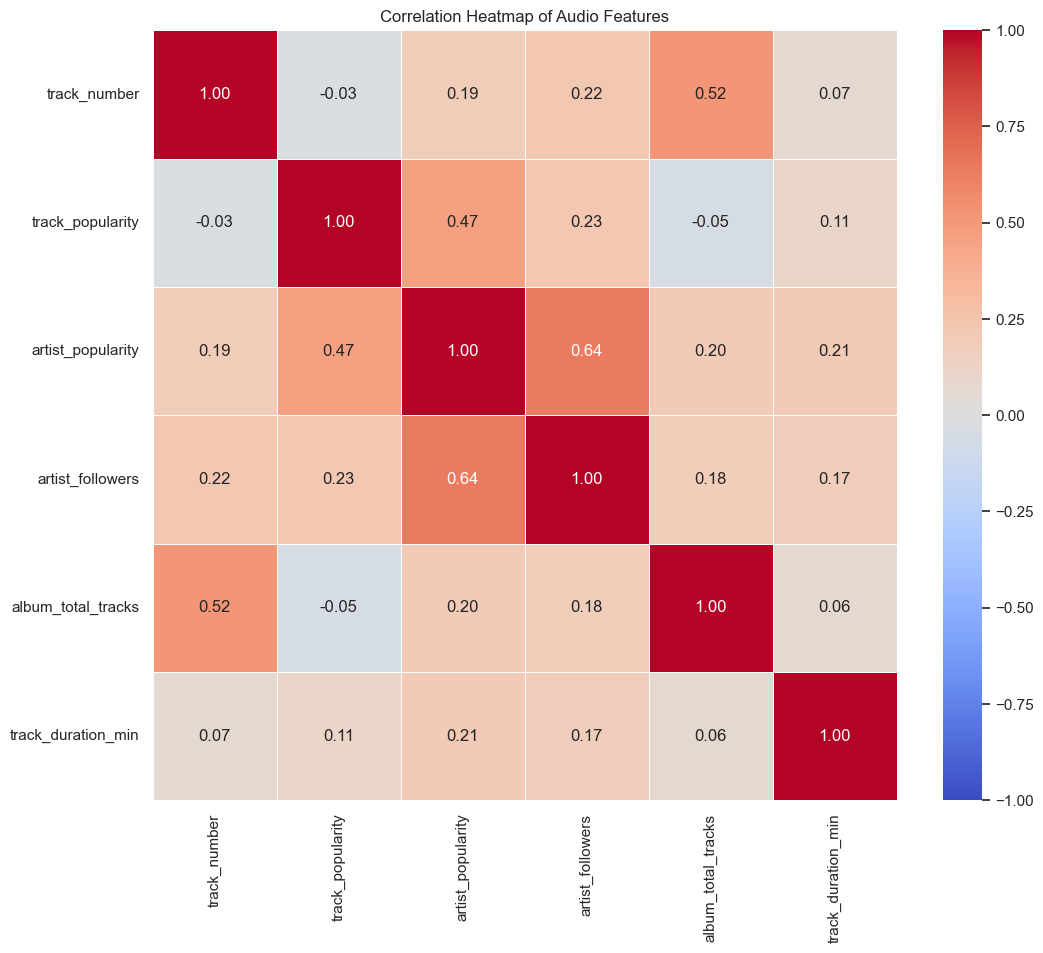

--- CÁC CẶP BIẾN CÓ TƯƠNG QUAN MẠNH (> 0.5 hoặc < -0.5) ---
artist_popularity - artist_followers: 0.64
album_total_tracks - track_number: 0.52


In [22]:
# --- PHẦN 1: MA TRẬN TƯƠNG QUAN (NUMERICAL VARIABLES) ---

# 1. Chọn các cột số (loại bỏ các cột không có ý nghĩa thống kê như ID, năm nếu cần)
# Lưu ý: Điều chỉnh danh sách này nếu dataset của bạn có các cột số khác
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# Tính ma trận tương quan
corr_matrix = df[numeric_cols].corr()

# 2. Vẽ Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, 
            annot=True,       # Hiển thị số
            fmt=".2f",        # Làm tròn 2 chữ số
            cmap='coolwarm',  # Màu: Đỏ (dương) - Xanh (âm)
            linewidths=0.5, 
            vmin=-1, vmax=1)  # Giới hạn thang đo từ -1 đến 1
plt.title('Correlation Heatmap of Audio Features')
plt.show()

# 3. Tự động tìm các cặp tương quan mạnh (Strongly Correlated Pairs)
# Ngưỡng (Threshold): > 0.5 hoặc < -0.5 được coi là có tương quan đáng kể
threshold = 0.5

print("--- CÁC CẶP BIẾN CÓ TƯƠNG QUAN MẠNH (> 0.5 hoặc < -0.5) ---")
# Chuyển ma trận thành dạng danh sách
corr_pairs = corr_matrix.unstack()
# Sắp xếp và loại bỏ các cặp trùng lặp (ví dụ: A-B giống B-A) và tự tương quan (A-A)
sorted_pairs = corr_pairs.sort_values(kind="quicksort", ascending=False)
strong_pairs = sorted_pairs[(abs(sorted_pairs) > threshold) & (abs(sorted_pairs) < 1.0)]

# In kết quả (lọc trùng lặp bằng cách chỉ lấy index chẵn hoặc dùng set, ở đây dùng cách đơn giản)
unique_pairs = []
for index, value in strong_pairs.items():
    pair = tuple(sorted(index)) # Sắp xếp tên cột để (A, B) giống (B, A)
    if pair not in unique_pairs:
        unique_pairs.append(pair)
        print(f"{index[0]} - {index[1]}: {value:.2f}")

if not unique_pairs:
    print("Không tìm thấy cặp biến nào có tương quan mạnh trên mức ngưỡng này.")

⚠️ Chưa thấy cột 'year'. Đang tìm cột ngày tháng để tạo lại...
✅ Đã tìm thấy cột ngày tháng gốc là: 'album_release_date'
-> Đã tạo thành công cột 'year'!

--- Bảng chéo: Năm vs Nội dung nhạy cảm (Explicit) ---


explicit,False,True
year,,
2016,256,120
2017,359,99
2018,317,205
2019,345,151
2020,318,162
2021,301,142
2022,329,139
2023,365,158
2024,446,202


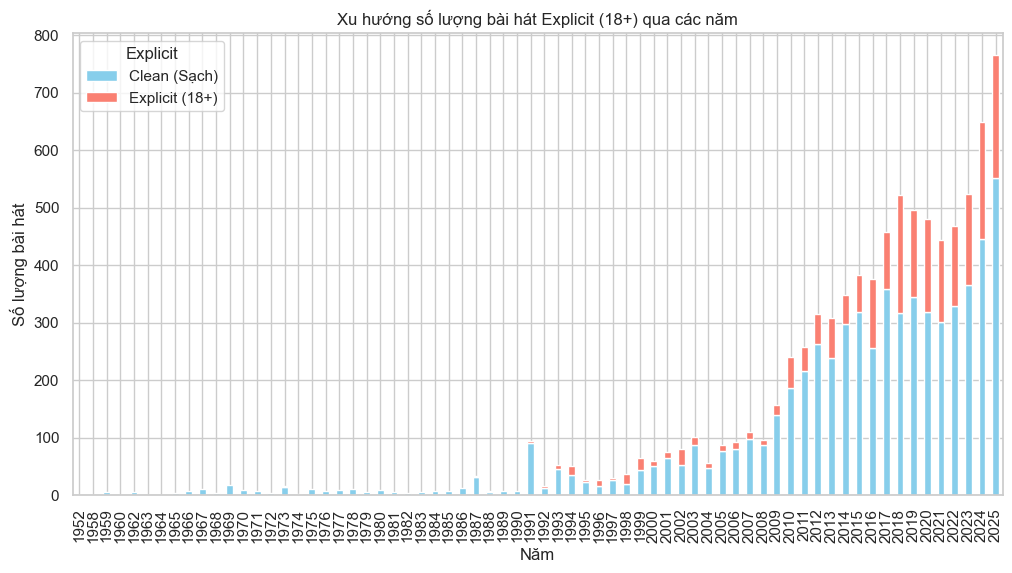

In [23]:
# --- BƯỚC 1: SỬA LỖI THIẾU CỘT 'YEAR' ---

# Kiểm tra nếu chưa có cột 'year'
if 'year' not in df.columns:
    print("⚠️ Chưa thấy cột 'year'. Đang tìm cột ngày tháng để tạo lại...")
    
    # Các tên cột ngày tháng thường gặp trong dataset Spotify
    possible_date_cols = ['album_release_date', 'date', 'Date', 'Release Date']
    
    found_date_col = None
    for col in possible_date_cols:
        if col in df.columns:
            found_date_col = col
            break
            
    if found_date_col:
        print(f"✅ Đã tìm thấy cột ngày tháng gốc là: '{found_date_col}'")
        # Chuyển đổi sang dạng thời gian và trích xuất năm
        df[found_date_col] = pd.to_datetime(df[found_date_col], errors='coerce')
        df['year'] = df[found_date_col].dt.year
        print("-> Đã tạo thành công cột 'year'!")
    else:
        print("❌ LỖI: Không tìm thấy cột ngày tháng nào cả. Vui lòng kiểm tra danh sách cột bên dưới:")
        print(df.columns.tolist())

# --- BƯỚC 2: CHẠY LẠI PHẦN CROSS-TABULATION ---

# Chỉ chạy khi đã có cột year và explicit
if 'year' in df.columns and 'explicit' in df.columns:
    print("\n--- Bảng chéo: Năm vs Nội dung nhạy cảm (Explicit) ---")
    
    # 1. Tạo bảng chéo
    cross_tab_explicit = pd.crosstab(df['year'], df['explicit'])
    
    # 2. Hiển thị dữ liệu
    display(cross_tab_explicit.tail(10)) 
    
    # 3. Vẽ biểu đồ
    cross_tab_explicit.plot(kind='bar', stacked=True, figsize=(12, 6), color=['skyblue', 'salmon'])
    plt.title("Xu hướng số lượng bài hát Explicit (18+) qua các năm")
    plt.ylabel("Số lượng bài hát")
    plt.xlabel("Năm")
    plt.legend(title='Explicit', labels=['Clean (Sạch)', 'Explicit (18+)'])
    plt.show()

elif 'year' in df.columns:
    print("Không có cột 'explicit' nhưng đã có 'year'. Hãy thử phương án phân tích khác.")
else:
    print("Vẫn chưa tạo được cột 'year' do không tìm thấy dữ liệu ngày tháng gốc.")


--- Thống kê 'track_popularity' theo 'artist_genres' ---
Top 10 thể loại có độ phổ biến trung bình cao nhất:


,count,mean,std,min,25%,50%,75%,max
artist_genres,,,,,,,,
pop soul,3.00,90.33,4.51,86.00,88.00,90.00,92.50,95.00
"corrido, corridos tumbados, corridos bélicos, música mexicana, sierreño, banda, electro corridos, sad sierreño",2.00,87.00,0.00,87.00,87.00,87.00,87.00,87.00
"alternative r&b, indie soul",2.00,86.50,3.54,84.00,85.25,86.50,87.75,89.00
"yacht rock, soft rock",1.00,86.00,NaN,86.00,86.00,86.00,86.00,86.00
"west coast hip hop, g-funk",1.00,86.00,NaN,86.00,86.00,86.00,86.00,86.00
"soft pop, neo soul",1.00,85.00,NaN,85.00,85.00,85.00,85.00,85.00
"brazilian funk, trap funk, funk consciente",1.00,85.00,NaN,85.00,85.00,85.00,85.00,85.00
"rock, hard rock, classic rock, rock and roll",3.00,84.67,0.58,84.00,84.50,85.00,85.00,85.00
"reggaeton, urbano latino",1.00,84.00,NaN,84.00,84.00,84.00,84.00,84.00


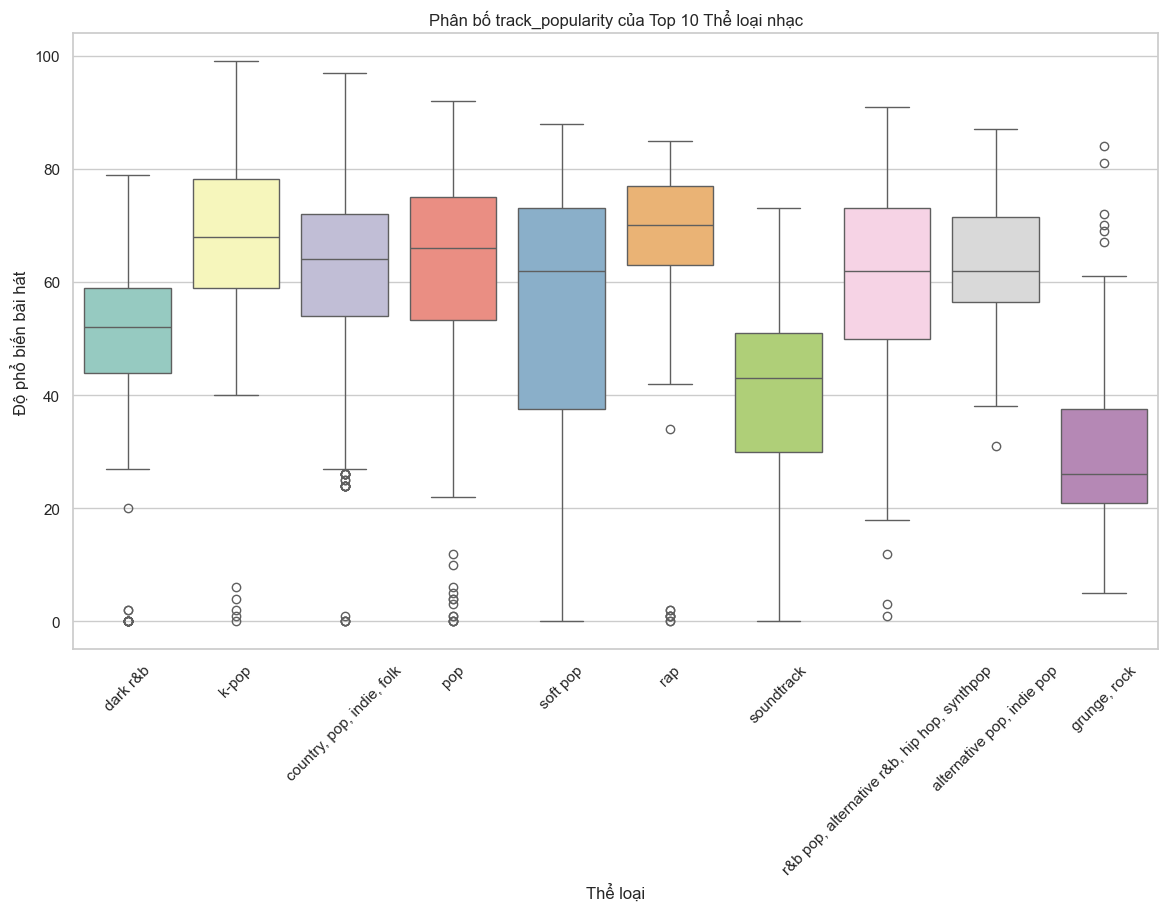

Nhận xét: Boxplot giúp ta thấy trung vị (đường giữa hộp) và các giá trị ngoại lai (các chấm đen).


In [24]:
# --- PHẦN 3: GROUPED SUMMARY STATISTICS (SỬA LỖI) ---

# 1. Xác định cột Popularity mục tiêu (Chọn track_popularity)
target_pop_col = 'track_popularity' 

# 2. Xác định cột Thể loại (Genre)
# Tìm tên cột genre trong dataset (thường là 'playlist_genre' hoặc 'genre')
genre_cols = [col for col in df.columns if 'genre' in col.lower()]
target_genre_col = genre_cols[0] if genre_cols else None

# Kiểm tra xem cả 2 cột có tồn tại không
if target_genre_col and target_pop_col in df.columns:
    print(f"\n--- Thống kê '{target_pop_col}' theo '{target_genre_col}' ---")
    
    # --- A. Bảng thống kê mô tả ---
    # Gom nhóm theo thể loại và tính toán trên cột track_popularity
    group_stats = df.groupby(target_genre_col)[target_pop_col].describe().sort_values(by='mean', ascending=False)
    
    print("Top 10 thể loại có độ phổ biến trung bình cao nhất:")
    display(group_stats.head(10)) 
    
    # --- B. Trực quan hóa bằng Boxplot ---
    plt.figure(figsize=(14, 8))
    
    # Lấy top 10 thể loại xuất hiện nhiều nhất để vẽ cho đỡ rối
    top_genres = df[target_genre_col].value_counts().nlargest(10).index
    df_top_genres = df[df[target_genre_col].isin(top_genres)]
    
    sns.boxplot(x=target_genre_col, y=target_pop_col, data=df_top_genres, palette="Set3")
    plt.title(f'Phân bố {target_pop_col} của Top 10 Thể loại nhạc')
    plt.xlabel('Thể loại')
    plt.ylabel('Độ phổ biến bài hát')
    plt.xticks(rotation=45)
    plt.show()
    
    print("Nhận xét: Boxplot giúp ta thấy trung vị (đường giữa hộp) và các giá trị ngoại lai (các chấm đen).")

else:
    print(f"❌ LỖI: Không tìm thấy cột '{target_pop_col}' hoặc cột Genre nào trong dataset.")
    print("Danh sách cột hiện có:", df.columns.tolist())

### 2.6 Initial Observations & Insights
1. Tóm tắt
- Tóm tắt các điểm nổi bật:
  - Bộ dữ liệu chứa thông tin hơn 8.000 bài hát, phân bố trên nhiều nghệ sĩ, album và thể loại nhạc khác nhau, tạo điều kiện phân tích đa dạng về âm nhạc và hành vi nghe nhạc.
  - Các trường dữ liệu cơ bản đều được điền đầy đủ (ngoại trừ `artist_genres` với tỉ lệ thiếu là $39$ %), bao gồm thông tin về track, artist, album, popularity, explicit → thuận lợi cho xử lý và phân tích thống kê.
- Vấn đề chất lượng dữ liệu đã phát hiện:
  - Thiếu thông tin thể loại nhạc (artist_genres) -> cần gán mặc định "Unknown".
  - Không có missing value ở các cột số (`track_popularity`, `artist_popularity`, `artist_followers`,`album_total_tracks`, `track_duration_min`) -> thuận lợi cho phân tích định lượng.
- Các bước tiền xử lý cần thiết:
  - Điền missing value cho `artist_genres` và `artist_name` bằng "Unknown".
- Các mẫu hình thú vị dẫn đến câu hỏi nghiên cứu:
  - Mối quan hệ giữa popularity và đặc điểm nghệ sĩ.
  - Các yếu tố ảnh hưởng đến `track_popularity`.

2. Cảnh báo dữ liệu (Red Flags)
- Các vấn đề nghiêm trọng về chất lượng dữ liệu:
  - `artist_genres` bị thiếu khoảng 39% → ảnh hưởng khi phân tích theo thể loại nhạc hoặc nhóm nghệ sĩ.
  - Dữ liệu lệch trái đối với các cột `track_number`, `artist_followers`, `album_total_tracks`
- Các hạn chế có thể ảnh hưởng đến phân tích:
  - `artist_followers` và `track_popularity` có thể thay đổi theo thời gian -> dữ liệu là snapshot tại một thời điểm, không phản ánh thay đổi thực tế.
  - Không có thông tin về quốc gia phát hành hoặc khu vực địa lý -> không thể phân tích sự khác biệt vùng miền hoặc quốc tế.

### 3. Question fomulation 

### 3.1. Nghệ sĩ có nhiều người theo dõi hơn (artist_followers) có bài hát phổ biến hơn không?

In [25]:
# Tính hệ số tương quan
corr_value = df['artist_followers'].corr(df['track_popularity'])
corr_rounded = round(corr_value, 3)

print(f"Hệ số tương quan giữa artist_followers và track_popularity: {corr_rounded}")

if abs(corr_value) < 0.3:
    print("-> Tương quan rất yếu (gần như không liên hệ).")
elif abs(corr_value) < 0.5:
    print("-> Tương quan yếu.")
elif abs(corr_value) < 0.7:
    print("-> Tương quan trung bình.")
else:
    print("-> Tương quan mạnh.")


Hệ số tương quan giữa artist_followers và track_popularity: 0.232
-> Tương quan rất yếu (gần như không liên hệ).


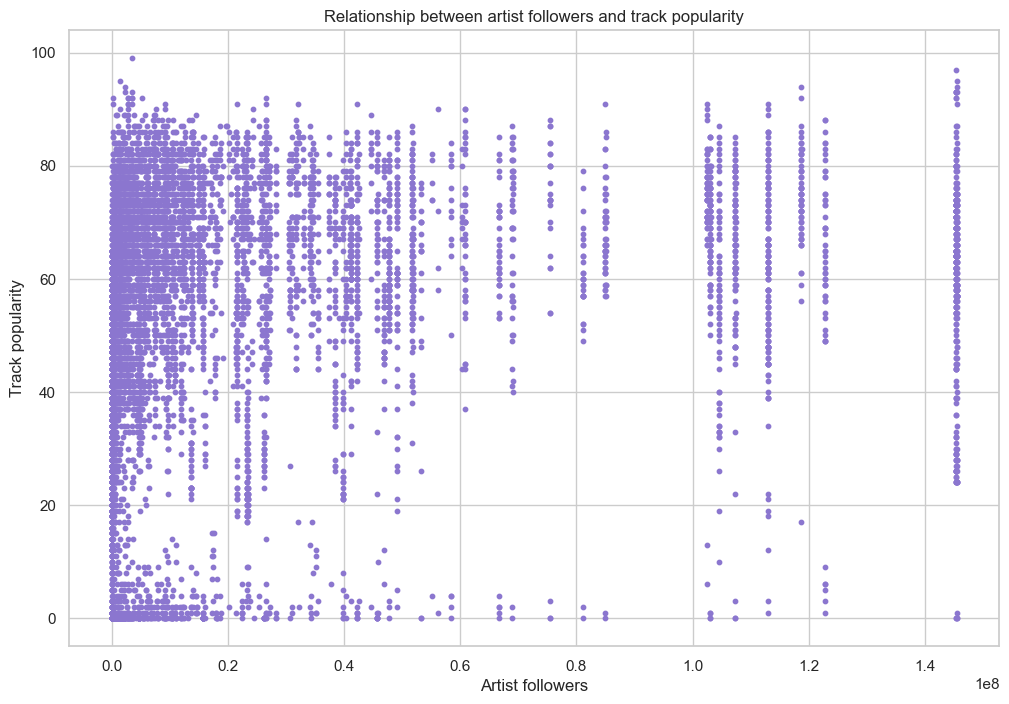

In [26]:
# Vẽ scatter plot
plt.figure(figsize=(12,8))
plt.scatter(df['artist_followers'], df['track_popularity'],color = "#8B76CF", s = 10)
plt.xlabel("Artist followers")
plt.ylabel("Track popularity")
plt.title("Relationship between artist followers and track popularity")
plt.show()

Dựa vào biểu đồ ta có thể kết luận rằng:  

1. Không có mối quan hệ tuyến tính rõ ràng giữa `artist_followers` và `track_popularity`  
Biểu đồ phân tán rất loang rộng, cho thấy rằng:
- Nghệ sĩ có ít followers vẫn có thể sở hữu những bài hát rất nổi tiếng (popularity 70–90).
- Nghệ sĩ có nhiều followers cũng có một số bài có mức popularity thấp.  
-> Điều này cho thấy số lượng người theo dõi nghệ sĩ không quyết định trực tiếp độ phổ biến của từng bài hát.

2. Tuy nhiên vẫn có xu hướng nhẹ  
Dù không tuyến tính mạnh, nhưng:
- Nhóm nghệ sĩ có trên 50 triệu followers thường có nhiều bài đạt popularity cao (60–90).
- Nghệ sĩ có lượng followers rất thấp hiếm khi có những bài đạt popularity trên 80.  
-> Nghĩa là followers cao giúp tăng khả năng bài hát được chú ý, nhưng không đảm bảo bài nào cũng nổi.

3. Sự phân nhóm theo mức followers  
Bạn có thể thấy:
- Rất nhiều điểm tập trung dày ở mức followers < 20 triệu (đa số nghệ sĩ).
- Một vài cột dọc rõ rệt ở 100M+, 130M+ followers (những superstars).
- Nhưng ngay cả trong nhóm "superstars", mức độ popularity vẫn dao động mạnh, không tụ lại ở 100.


### 3.2. Xu hướng sáng tác các thể loại âm nhạc (genres) thay đổi như thế nào theo thời gian trên Spotify?

In [27]:
# Tách những dòng có nhiều genre ra thành nhiều dòng
df_exploded = df.copy()
df_exploded['artist_genres'] = df_exploded['artist_genres'].str.split(',')
df_exploded = df_exploded.explode('artist_genres')
df_exploded['artist_genres'] = df_exploded['artist_genres'].str.strip()
df_exploded.head()

,track_id,track_name,track_number,track_popularity,explicit,artist_name,artist_popularity,artist_followers,artist_genres,album_id,album_name,album_release_date,album_total_tracks,album_type,track_duration_min,year
0,3EJS5LyekDim1Tf5rBFmZl,Trippy Mane (ft. Project Pat),4,0,True,Diplo,77,2812821,moombahton,5QRFnGnBeMGePBKF2xTz5z,"d00mscrvll, Vol. 1",2025-10-31,9,album,1.55,2025
1,1oQW6G2ZiwMuHqlPpP27DB,OMG!,1,0,True,Yelawolf,64,2363438,country hip hop,4SUmmwnv0xTjRcLdjczGg2,OMG!,2025-10-31,1,single,3.07,2025
1,1oQW6G2ZiwMuHqlPpP27DB,OMG!,1,0,True,Yelawolf,64,2363438,southern hip hop,4SUmmwnv0xTjRcLdjczGg2,OMG!,2025-10-31,1,single,3.07,2025
2,7mdkjzoIYlf1rx9EtBpGmU,Hard 2 Find,1,4,True,Riff Raff,48,193302,NaN,3E3zEAL8gUYWaLYB9L7gbp,Hard 2 Find,2025-10-31,1,single,2.55,2025
3,67rW0Zl7oB3qEpD5YWWE5w,Still Get Like That (ft. Project Pat & Starrah),8,30,True,Diplo,77,2813710,moombahton,5QRFnGnBeMGePBKF2xTz5z,"d00mscrvll, Vol. 1",2025-10-31,9,album,1.69,2025


In [28]:
# Lấy top
top_genres = (
    df_exploded['artist_genres']
    .value_counts()
    .head(10)
    .index
)

df_top = df_exploded[df_exploded['artist_genres'].isin(top_genres)]


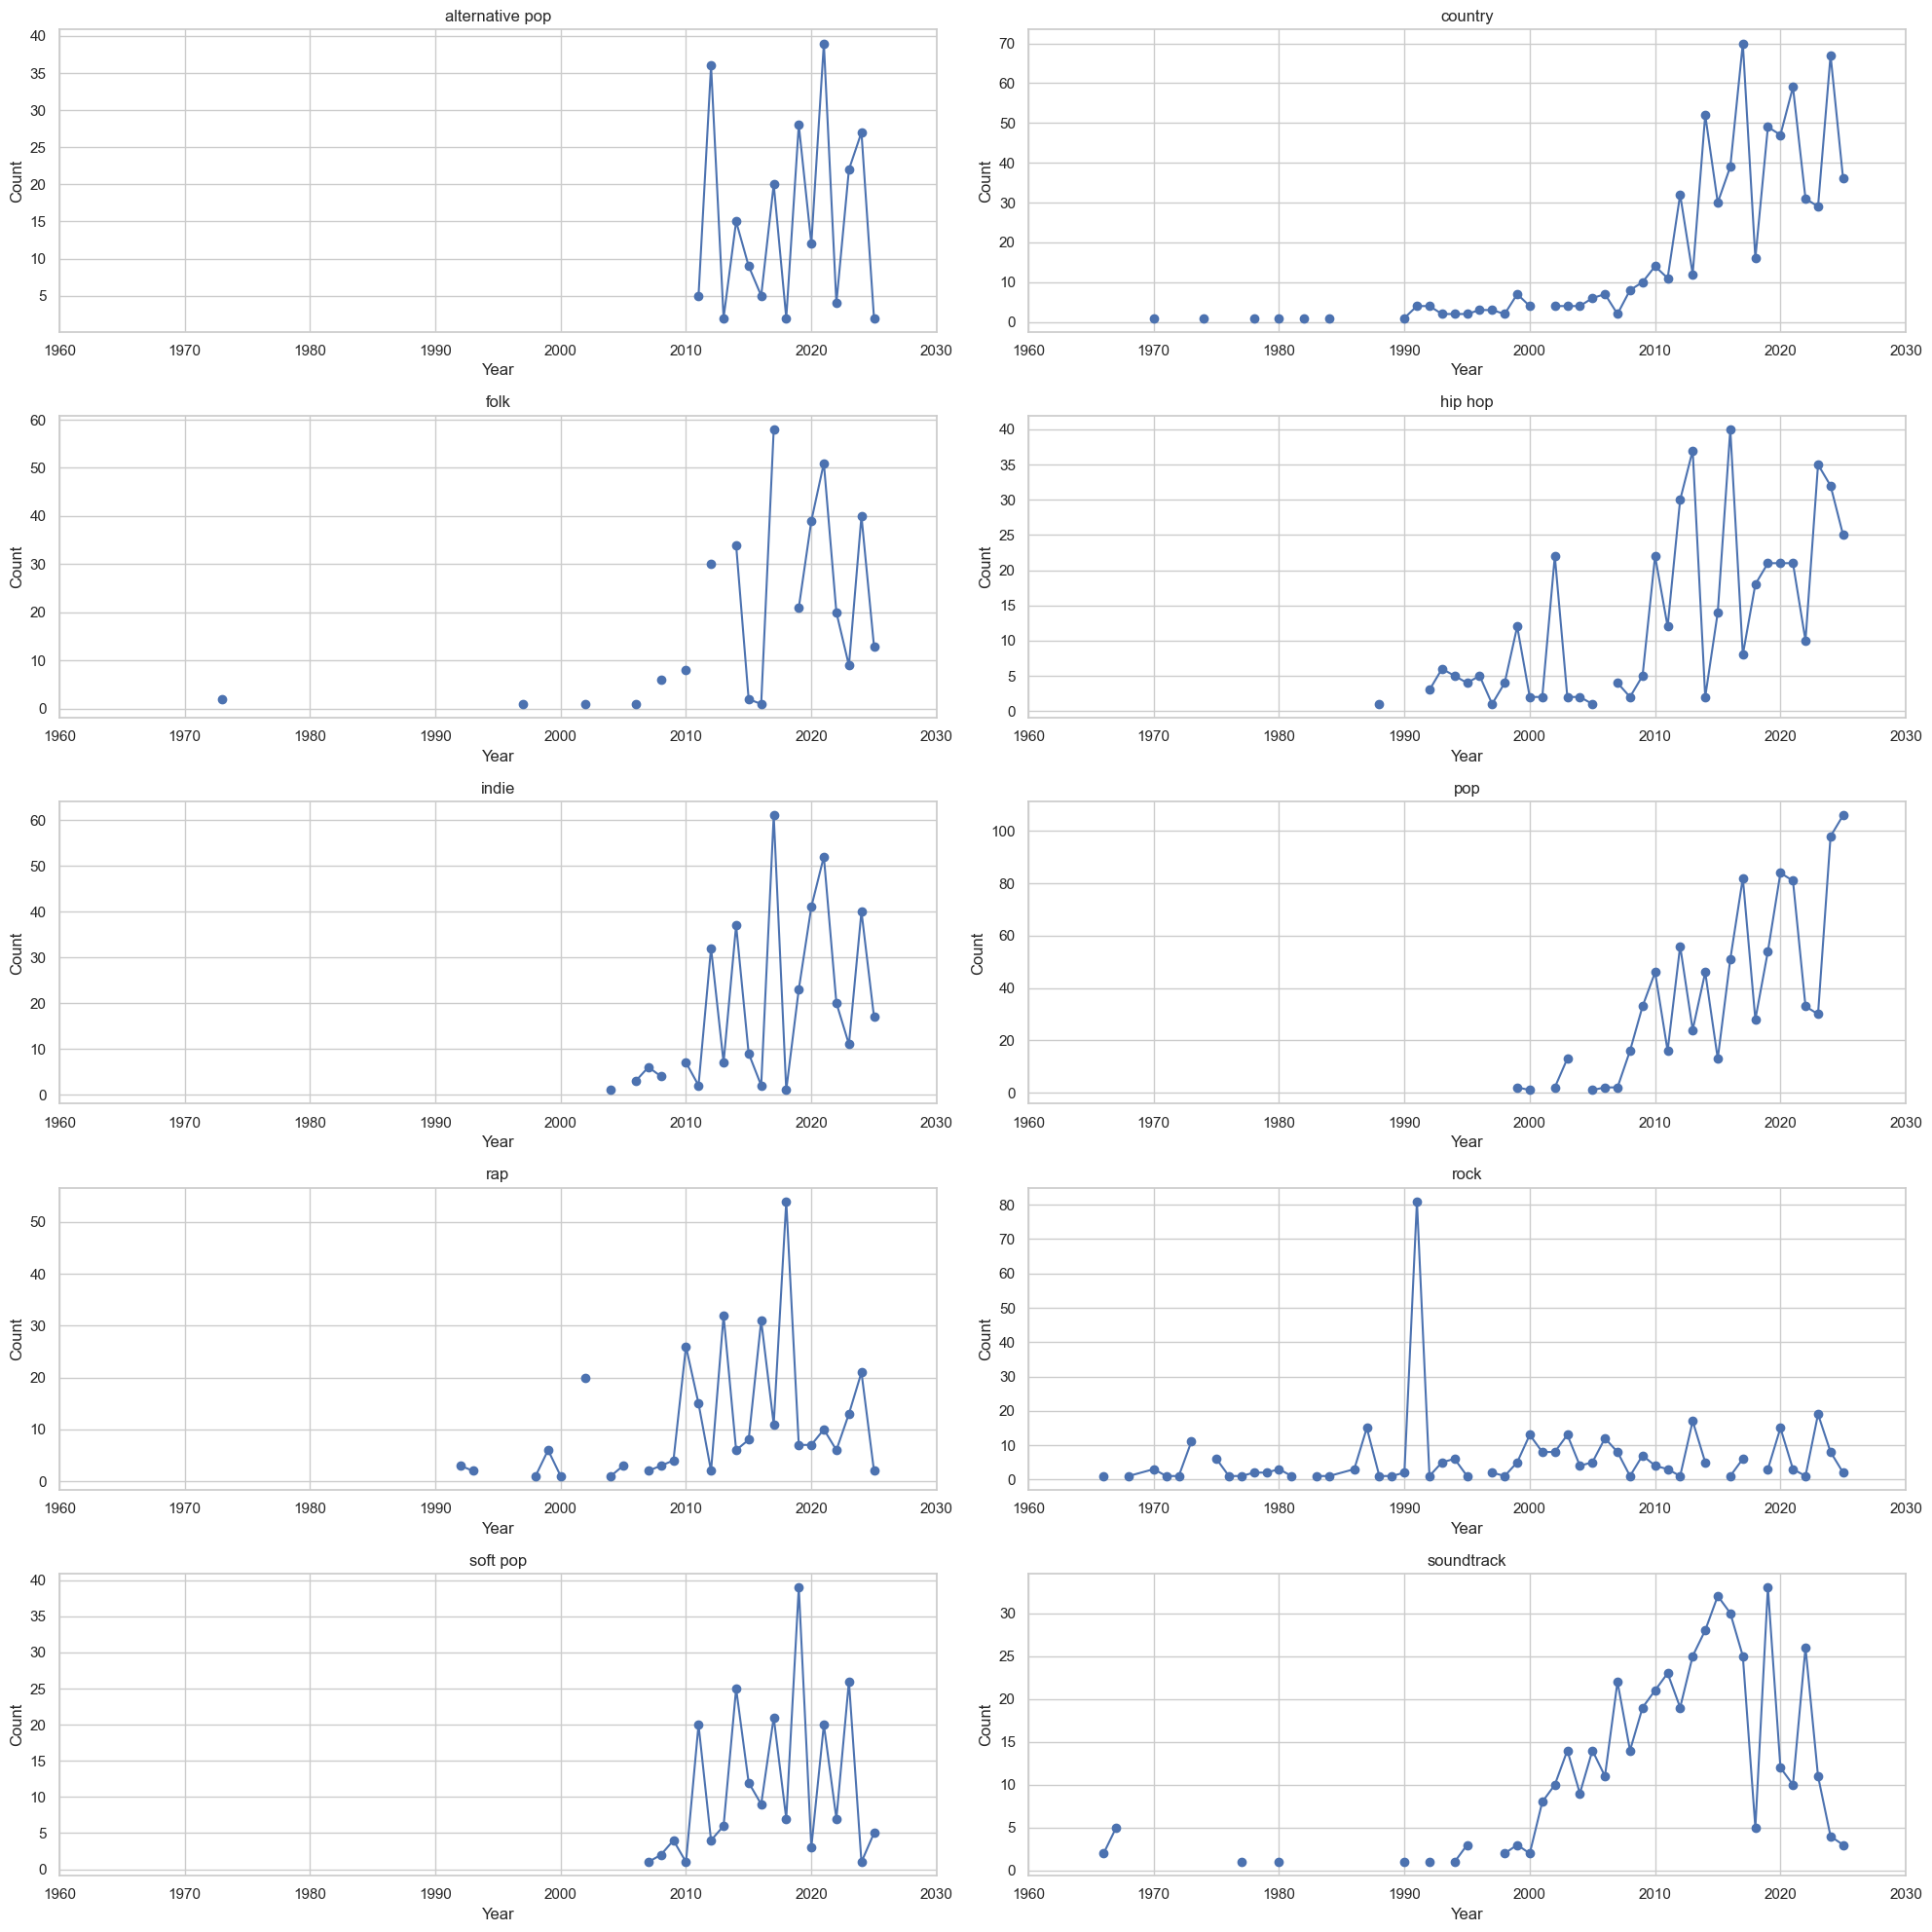

In [29]:
# Thống kê số lượng bài hát theo năm và genre
genre_year_count = df_top.groupby(['year', 'artist_genres']).size().reset_index(name='count')

# Pivot
pivot = genre_year_count.pivot(
    index='year',
    columns='artist_genres',
    values='count'
)

# Vẽ line chart 
genres = pivot.columns   # 10 genres
n = len(genres)

fig, axes = plt.subplots(5, 2, figsize=(20, 20))  # 5 dòng × 2 cột = 10 ô
axes = axes.flatten()    

for i, genre in enumerate(genres):
    ax = axes[i]
    
    ax.plot(pivot.index, pivot[genre], marker='o')
    ax.set_title(f"{genre}", fontsize=12)
    ax.set_xlabel("Year")
    ax.set_ylabel("Count")
    ax.set_xlim([1960, 2030])
    ax.grid(True)

plt.tight_layout()
plt.show()

Kết luận:  
1. Tổng quan xu hướng chung
- Số lượng track tăng mạnh sau 2005–2010
- Trước 2000: hầu như không có dữ liệu (Spotify chưa phổ biến, bài cũ chưa được đưa lên nhiều).
- Từ 2010 trở đi: tất cả các thể loại đều tăng mạnh -> đúng với thời kỳ streaming bùng nổ.
- 2020–2023 là giai đoạn đỉnh cao khi rất nhiều thể loại đạt số track cao nhất vào giai đoạn này: pop, country, hip hop, indie, soundtrack,...  
    -> Thời đại đại chúng hóa âm nhạc + số lượng nghệ sĩ bùng nổ.

2. Phân tích cụ thể từng thể loại nhạc:
- Pop, country, hip hop là 3 thể loại tăng trưởng mạnh và bền vững nhất.
- Rock suy giảm rõ rệt từ sau năm 1995.
- Alternative pop, indie, soft pop mang tính “trend-driven” → dao động mạnh theo năm.
- Soundtrack giảm sau 2020